In [19]:
import numpy as np
import pandas as pd
# For Visualization of data we would import
import matplotlib.pyplot as plt
import seaborn as sns
#For preprocessing like scaling,encoding we would import
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#for model selection we import
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#For measuring the performance of the model we will import
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Ensembleling
from sklearn.ensemble import RandomForestClassifier
#For saving the file we would import
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv')
#check first 5 rows
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [4]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
#
df.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

In [6]:
df.dtypes #Checking for the various datatypes that exist in the dataset


objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

# check unique values

In [7]:
#Now lets check and analyse the dataset in depth
df['objid'].unique()

array([1.23765e+18])

In [8]:
df['run'].unique()

array([ 752,  756,  308,  727,  745, 1035, 1045, 1140, 1231, 1332, 1334,
       1302, 1239, 1119, 1331, 1345, 1350, 1404, 1412, 1336, 1402, 1411,
       1356], dtype=int64)

In [9]:
df['rerun'].unique()

array([301], dtype=int64)

In [10]:
df['specobjid'].unique()

array([3.72236e+18, 3.63814e+17, 3.23274e+17, ..., 5.03345e+17,
       5.03340e+17, 5.03341e+17])

In [11]:
#lets check the unique values in the loops
for i in df.keys():
    print('Column Name: ',i)
    print(df[i].unique())

Column Name:  objid
[1.23765e+18]
Column Name:  ra
[183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]
Column Name:  dec
[ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
Column Name:  u
[19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.27586]
Column Name:  g
[17.0424  17.21449 18.19169 ... 17.77784 17.91068 17.37829]
Column Name:  r
[15.94699 16.67637 17.47428 ... 17.51872 17.53152 16.30542]
Column Name:  i
[15.50342 16.48922 17.08732 ... 17.43302 17.36284 15.83548]
Column Name:  z
[15.22531 16.3915  16.80125 ... 17.42048 17.13988 15.50588]
Column Name:  run
[ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
Column Name:  rerun
[301]
Column Name:  camcol
[4 2 1 5 6 3]
Column Name:  field
[267 268 269 270 271 272 273 274 275 276 277 278 279 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 502 503
 504 505 506 508 509 510 511 5

In [12]:
#As the columns objid and rerun has only one unique values dropping them would not affect the data
df.drop(['objid','rerun'],axis=1,inplace=True)

In [13]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field     specobjid   class  redshift  plate    mjd  fiberid  
0  752       4    267  3.722360e+18    STAR -0.000009   3306  54922      491  
1  752       4    267  3.638140e+17    STAR -0.000055    323  51615      541  
2  752       4    268  3.232740e+17  GALAXY  0.123111    287  52023      513  
3  752       4    269  3.722370e+18    STAR -0.000111   3306  54922      510  
4  752       4    269  3.722370e+18    STAR  0.000590   3306  54922      512

In [14]:
df.shape

(10000, 16)

# check null values in data set`

In [15]:
df.isnull()

ra    dec      u      g      r      i      z    run  camcol  field  \
0     False  False  False  False  False  False  False  False   False  False   
1     False  False  False  False  False  False  False  False   False  False   
2     False  False  False  False  False  False  False  False   False  False   
3     False  False  False  False  False  False  False  False   False  False   
4     False  False  False  False  False  False  False  False   False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...     ...    ...   
9995  False  False  False  False  False  False  False  False   False  False   
9996  False  False  False  False  False  False  False  False   False  False   
9997  False  False  False  False  False  False  False  False   False  False   
9998  False  False  False  False  False  False  False  False   False  False   
9999  False  False  False  False  False  False  False  False   False  False   

      specobjid  class  redshift  plate    mjd  fiberid  
0         False  False     False  False  False    False  
1         False  False     False  False  False    False  
2         False  False     False  False  False    False  
3         False  False     False  False  False    False  
4         False  False     False  False  False    False  
...         ...    ...       ...    ...    ...      ...  
9995      False  False     False  False  False    False  
9996      False  False     False  False  False    False  
9997      False  False     False  False  False    False  
9998      False  False     False  False  False    False  
9999      False  False     False  False  False    False  

[10000 rows x 16 columns]

In [16]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

<AxesSubplot:>

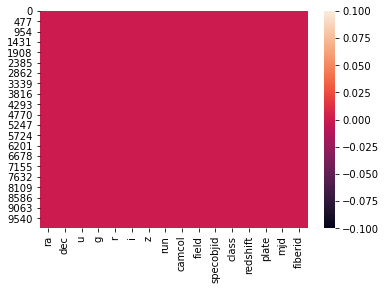

In [17]:
sns.heatmap(df.isnull())#From this we can understand that there are no missing values in the data set

<AxesSubplot:xlabel='class', ylabel='count'>

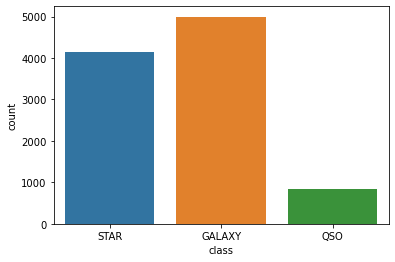

In [20]:
#Now lets visualize how many stars, galaxy and quarsar exists in the dataset
sns.countplot(df['class'])

In [21]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [22]:
#Now lets find the correlation between different columns of the dataset
df.corr()

ra       dec         u         g         r         i  \
ra         1.000000  0.003596  0.031238  0.043909  0.047103  0.045731   
dec        0.003596  1.000000  0.035279  0.061875  0.063404  0.058292   
u          0.031238  0.035279  1.000000  0.849232  0.692379  0.602630   
g          0.043909  0.061875  0.849232  1.000000  0.958106  0.907419   
r          0.047103  0.063404  0.692379  0.958106  1.000000  0.977672   
i          0.045731  0.058292  0.602630  0.907419  0.977672  1.000000   
z          0.042950  0.056870  0.551483  0.879622  0.969197  0.981507   
run       -0.092741  0.778385  0.038229  0.058446  0.057261  0.049765   
camcol    -0.006294  0.114614  0.009945  0.010223  0.010747  0.013461   
field      0.594700 -0.131471  0.008548  0.014651  0.017133  0.019781   
specobjid -0.095327  0.088345 -0.129429 -0.054979  0.019788  0.072960   
redshift   0.030307  0.067021  0.163741  0.407576  0.441080  0.431450   
plate     -0.095329  0.088342 -0.129430 -0.054981  0.019787  0.072958   
mjd       -0.086887  0.066147 -0.168793 -0.092772 -0.009345  0.050896   
fiberid    0.057485  0.155012  0.011301  0.047187  0.061081  0.069977   

                  z       run    camcol     field  specobjid  redshift  \
ra         0.042950 -0.092741 -0.006294  0.594700  -0.095327  0.030307   
dec        0.056870  0.778385  0.114614 -0.131471   0.088345  0.067021   
u          0.551483  0.038229  0.009945  0.008548  -0.129429  0.163741   
g          0.879622  0.058446  0.010223  0.014651  -0.054979  0.407576   
r          0.969197  0.057261  0.010747  0.017133   0.019788  0.441080   
i          0.981507  0.049765  0.013461  0.019781   0.072960  0.431450   
z          1.000000  0.048252  0.010930  0.018248   0.112398  0.424034   
run        0.048252  1.000000  0.151814 -0.463898   0.093604  0.059056   
camcol     0.010930  0.151814  1.000000 -0.067921   0.040809  0.006834   
field      0.018248 -0.463898 -0.067921  1.000000  -0.093724  0.015414   
specobjid  0.112398  0.093604  0.040809 -0.093724   1.000000 -0.038090   
redshift   0.424034  0.059056  0.006834  0.015414  -0.038090  1.000000   
plate      0.112397  0.093601  0.040795 -0.093723   1.000000 -0.038091   
mjd        0.095658  0.070354  0.026284 -0.086558   0.966880 -0.057957   
fiberid    0.067980  0.138566  0.535629 -0.040493   0.229837  0.046532   

              plate       mjd   fiberid  
ra        -0.095329 -0.086887  0.057485  
dec        0.088342  0.066147  0.155012  
u         -0.129430 -0.168793  0.011301  
g         -0.054981 -0.092772  0.047187  
r          0.019787 -0.009345  0.061081  
i          0.072958  0.050896  0.069977  
z          0.112397  0.095658  0.067980  
run        0.093601  0.070354  0.138566  
camcol     0.040795  0.026284  0.535629  
field     -0.093723 -0.086558 -0.040493  
specobjid  1.000000  0.966880  0.229837  
redshift  -0.038091 -0.057957  0.046532  
plate      1.000000  0.966881  0.229811  
mjd        0.966881  1.000000  0.190328  
fiberid    0.229811  0.190328  1.000000

<AxesSubplot:>

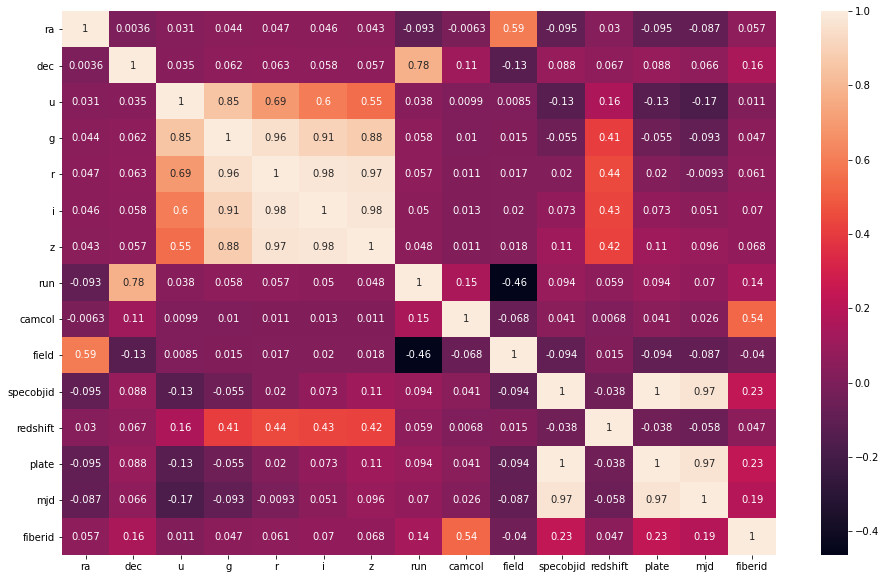

In [23]:
#Now lets plot the correlation using heatmap to understand the correlation using visualization
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [24]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [25]:
df['class'].unique()

array([2, 0, 1])

<AxesSubplot:>

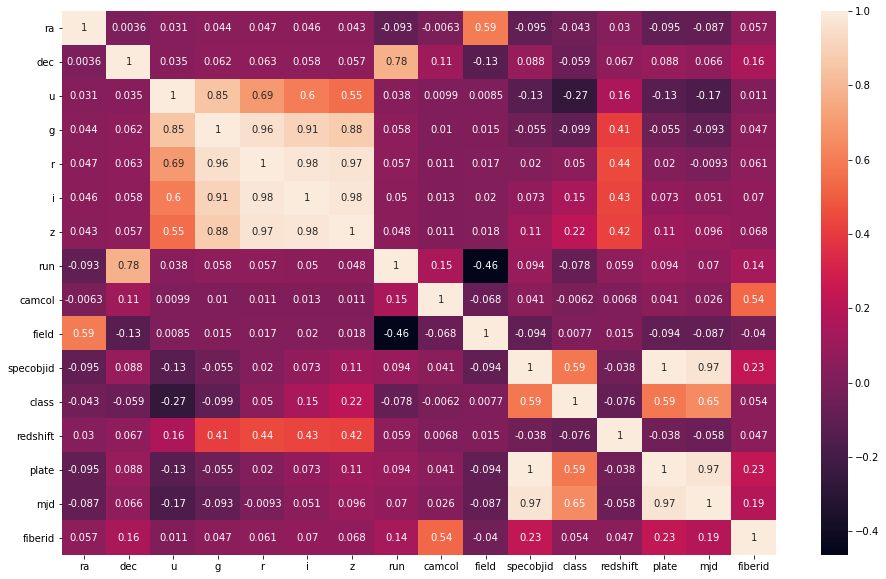

In [26]:
#Now we have converted our categorical column to numerical format now lets again plot and check what happens
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

ra               AxesSubplot(0.125,0.71587;0.168478x0.16413)
dec           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
u             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
g             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
r               AxesSubplot(0.125,0.518913;0.168478x0.16413)
i            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
z            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
run          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
camcol          AxesSubplot(0.125,0.321957;0.168478x0.16413)
field        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
specobjid    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
class        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
redshift           AxesSubplot(0.125,0.125;0.168478x0.16413)
plate           AxesSubplot(0.327174,0.125;0.168478x0.16413)
mjd             AxesSubplot(0.529348,0.125;0.168478x0.16413)
fiberid         AxesSubplot(0.731522,0.125;0.168478x0.16413)
dtype: object

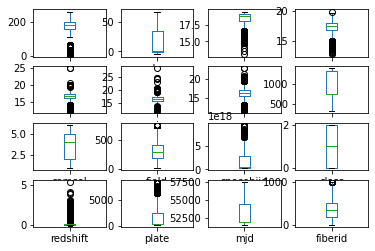

In [27]:
#Now lets check for outliers
df.plot(kind='box',subplots=True,layout=(4,4))

<AxesSubplot:title={'center':'Different Celestical bodies'}, xlabel='class', ylabel='Density'>

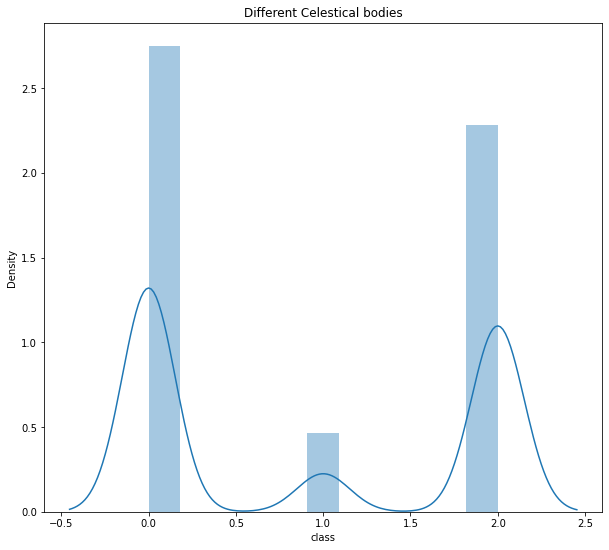

In [28]:
plt.figure(figsize=(10,9))
plt.title("Different Celestical bodies")
sns.distplot(df['class'])

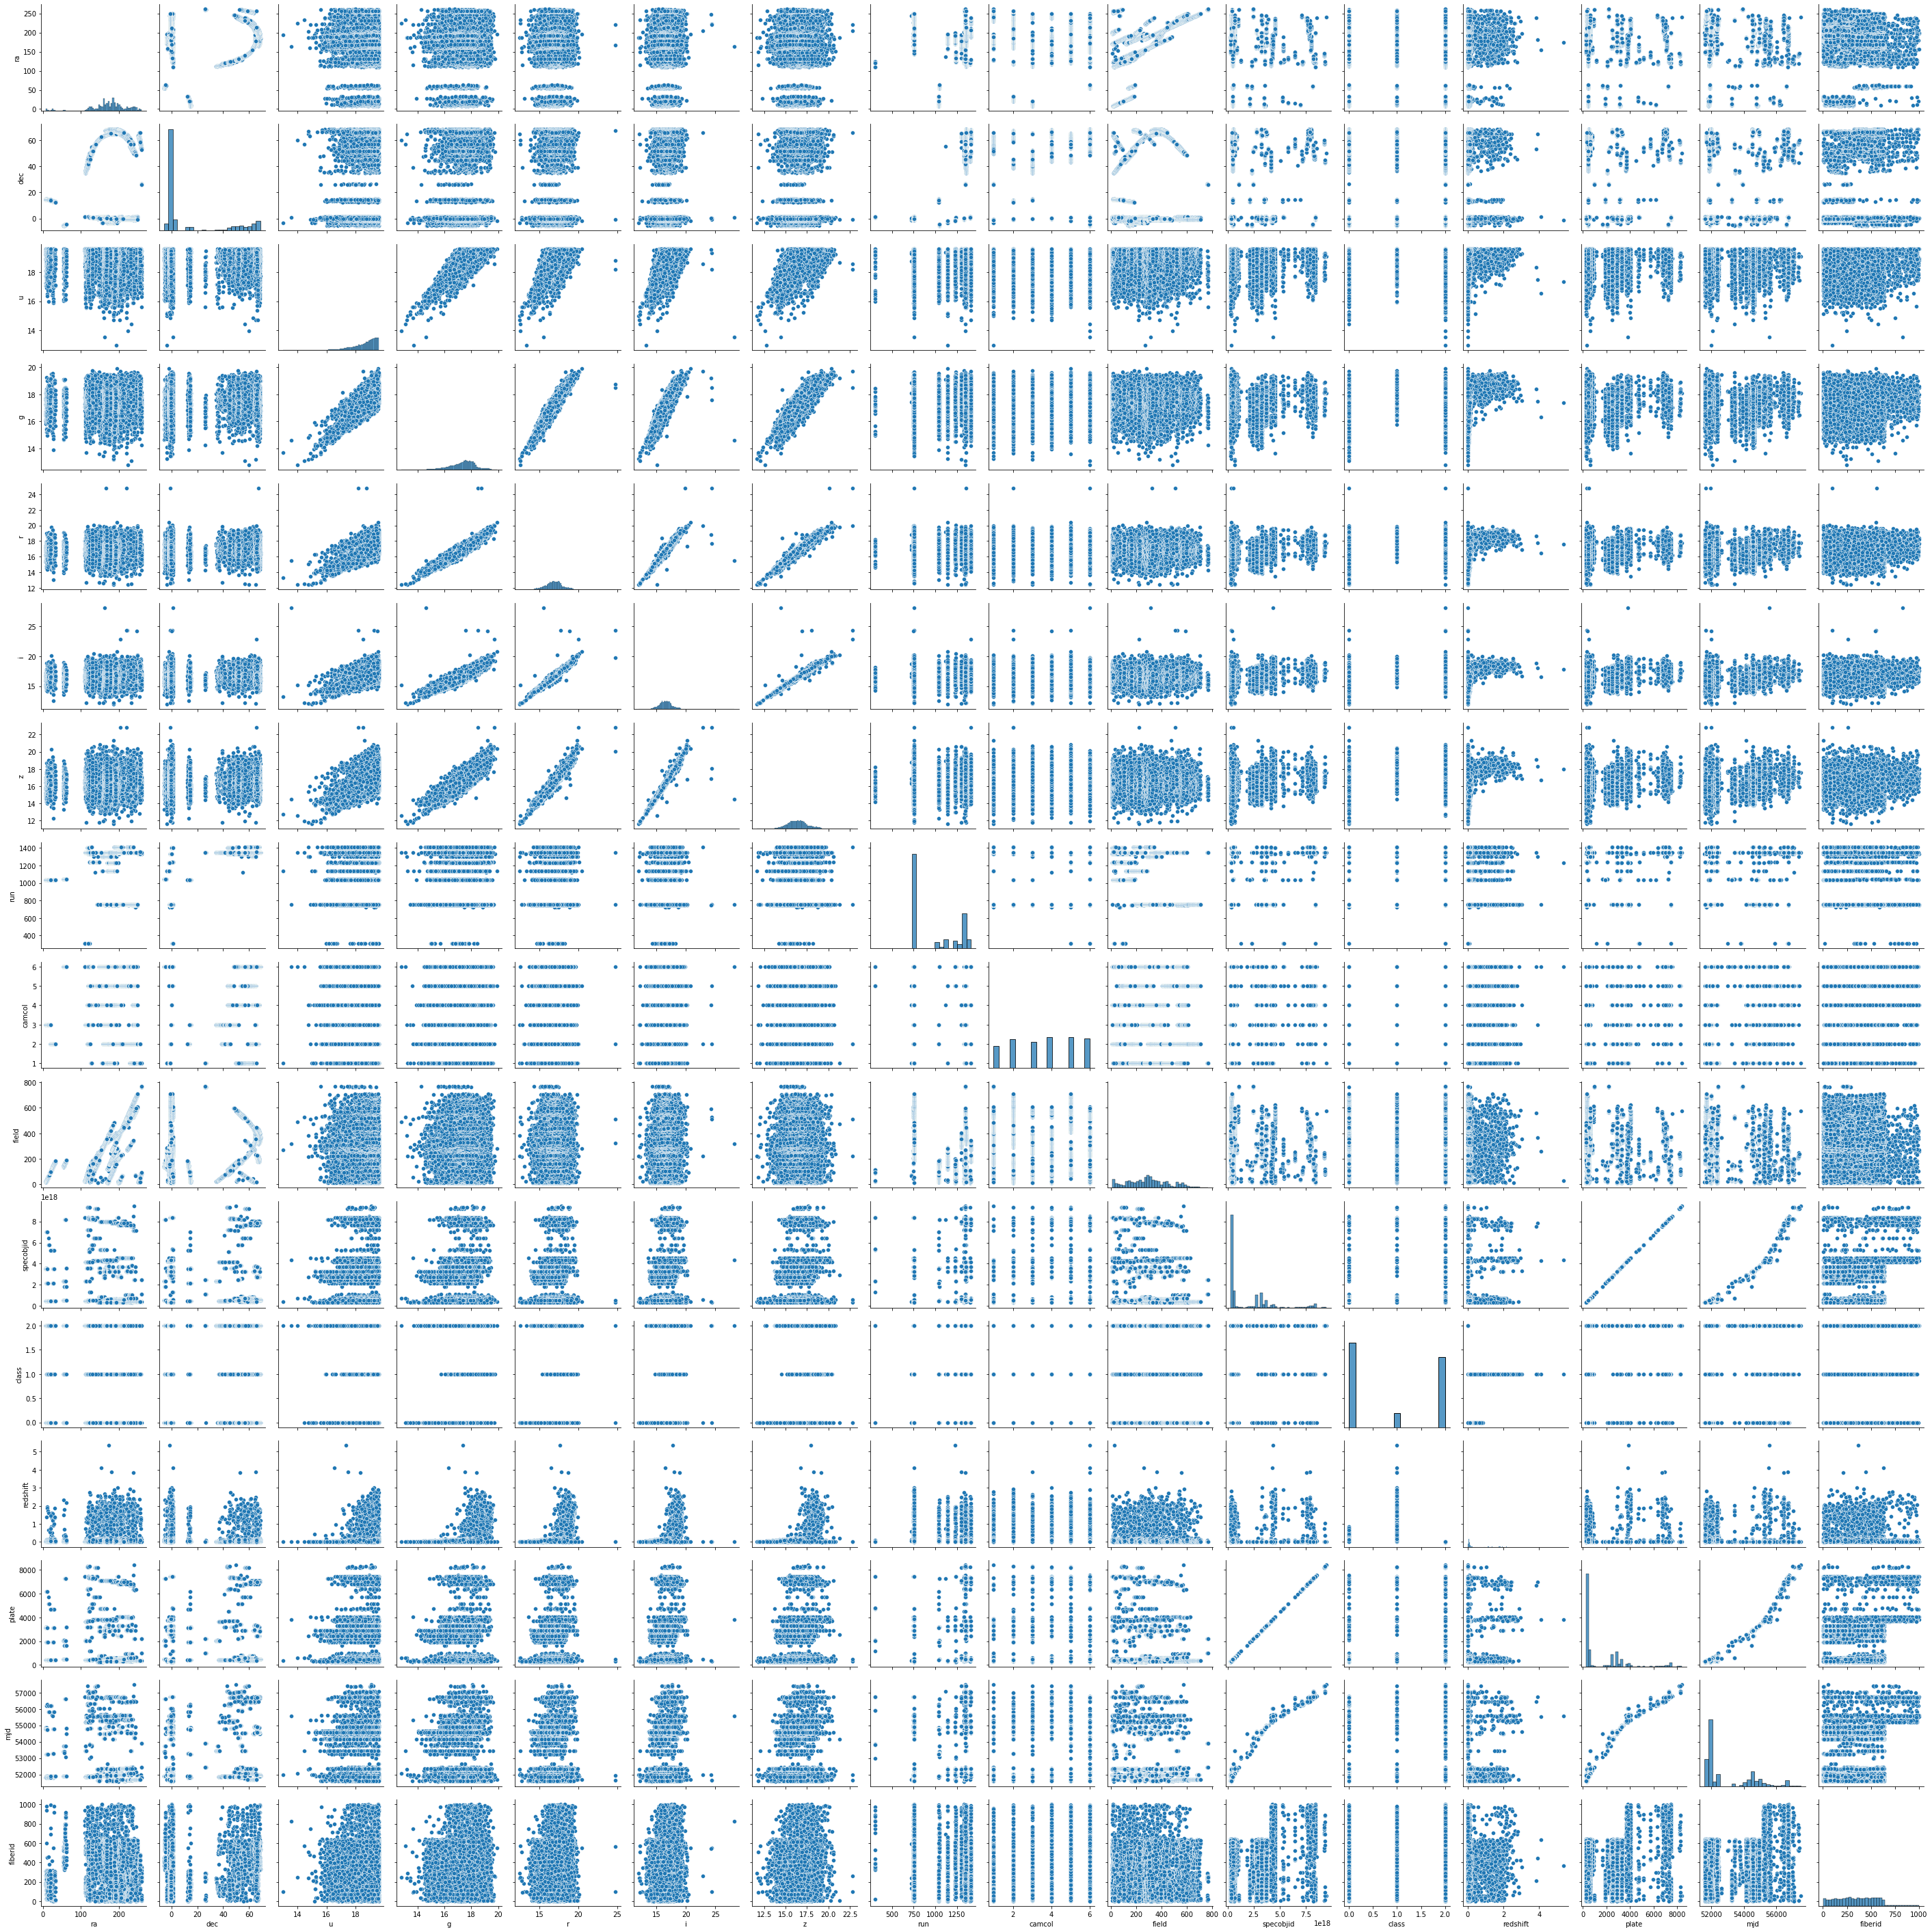

In [29]:
sns.pairplot(df)

In [30]:
#Lets check for skewness in the dataset
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [31]:
#Now lets treat the outliers and remove the skewness in the data
import scipy.stats
from scipy.stats import zscore
z=np.abs(zscore(df))
zscore

<function scipy.stats.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')>

In [32]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([12, 12, 12, ..., 13, 10, 13], dtype=int64))


In [33]:
#Now lets remove the outliers
df_new=df[(z<3).all(axis=1)]
df_new

ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9993  131.398915  51.533706  17.79613  16.02621  15.15955  14.71488  14.33840   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field     specobjid  class  redshift  plate    mjd  \
0      752       4    267  3.722360e+18      2 -0.000009   3306  54922   
1      752       4    267  3.638140e+17      2 -0.000055    323  51615   
2      752       4    268  3.232740e+17      0  0.123111    287  52023   
3      752       4    269  3.722370e+18      2 -0.000111   3306  54922   
4      752       4    269  3.722370e+18      2  0.000590   3306  54922   
...    ...     ...    ...           ...    ...       ...    ...    ...   
9993  1345       3    161  5.033460e+17      0  0.055515    447  51877   
9995  1345       3    161  5.033450e+17      0  0.027583    447  51877   
9996  1345       3    162  5.033400e+17      0  0.117772    447  51877   
9998  1345       3    163  5.033400e+17      0  0.014019    447  51877   
9999  1345       3    163  5.033410e+17      0  0.118417    447  51877   

      fiberid  
0         491  
1         541  
2         513  
3         510  
4         512  
...       ...  
9993      249  
9995      246  
9996      228  
9998      229  
9999      233  

[8698 rows x 16 columns]

In [34]:
df.shape

(10000, 16)

In [35]:
df_new.shape

(8698, 16)

In [36]:
y1=df_new.iloc[:,11:12]#setting output for new data after removing outliers
y2=df.iloc[:,11:12]#setting output for original data
#we would be analyzing both the data ie after outlier removal and before removal
x1=df_new.drop(['class'],axis=1)
x2=df.drop(['class'],axis=1)

In [37]:
scale=StandardScaler()
x1=scale.fit_transform(x1)

In [38]:
x2=scale.fit_transform(x2)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=42)

In [41]:
model=[GaussianNB(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy Score of GaussianNB() is:
0.9209334726576106
[[1527   52    6]
 [  13  121    0]
 [ 129   27  996]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1585
           1       0.60      0.90      0.72       134
           2       0.99      0.86      0.92      1152

    accuracy                           0.92      2871
   macro avg       0.84      0.91      0.86      2871
weighted avg       0.93      0.92      0.92      2871

Accuracy Score of DecisionTreeClassifier() is:
0.9822361546499477
[[1558   19    8]
 [  19  115    0]
 [   4    1 1147]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1585
           1       0.85      0.86      0.86       134
           2       0.99      1.00      0.99      1152

    accuracy                           0.98      2871
   macro avg       0.94      0.95      0.94      2871
weighted avg       0.98      0.98      0.98      2871

Accuracy

In [42]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy Score for Random Forest is')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score for Random Forest is
0.988854057819575
[[1570    6    9]
 [  17  117    0]
 [   0    0 1152]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1585
           1       0.95      0.87      0.91       134
           2       0.99      1.00      1.00      1152

    accuracy                           0.99      2871
   macro avg       0.98      0.95      0.97      2871
weighted avg       0.99      0.99      0.99      2871



In [43]:
filename='Space Server Project.pkl'
pickle.dump(rf,open(filename,'wb'))